## SELECTION DES ATTRIBUTS

#### EXO1

#### EXO2

In [679]:
import pandas as pd

In [680]:
import numpy as np

url = "./airquality.csv"
data = pd.read_csv(url, sep=',')

data = data[~np.isnan(data).any(axis=1)]

print(data.columns)

Index(['Unnamed: 0', 'Ozone', 'Solar.R', 'Wind', 'Temp', 'Month', 'Day'], dtype='object')


In [681]:
data.shape

(111, 7)

In [682]:
data.columns

Index(['Unnamed: 0', 'Ozone', 'Solar.R', 'Wind', 'Temp', 'Month', 'Day'], dtype='object')

In [683]:
data.head()

,Unnamed: 0,Ozone,Solar.R,Wind,Temp,Month,Day
0,1,41.0,190.0,7.4,67,5,1
1,2,36.0,118.0,8.0,72,5,2
2,3,12.0,149.0,12.6,74,5,3
3,4,18.0,313.0,11.5,62,5,4
6,7,23.0,299.0,8.6,65,5,7


In [684]:
data = data.drop(data.columns[0], axis=1) 

Correlation matrix

In [685]:
df = pd.DataFrame(data)

correlation = df.corr()
print(correlation)

            Ozone   Solar.R      Wind      Temp     Month       Day
Ozone    1.000000  0.348342 -0.612497  0.698541  0.142885 -0.005190
Solar.R  0.348342  1.000000 -0.127183  0.294088 -0.074067 -0.057754
Wind    -0.612497 -0.127183  1.000000 -0.497190 -0.194496  0.049871
Temp     0.698541  0.294088 -0.497190  1.000000  0.403972 -0.096546
Month    0.142885 -0.074067 -0.194496  0.403972  1.000000 -0.009001
Day     -0.005190 -0.057754  0.049871 -0.096546 -0.009001  1.000000


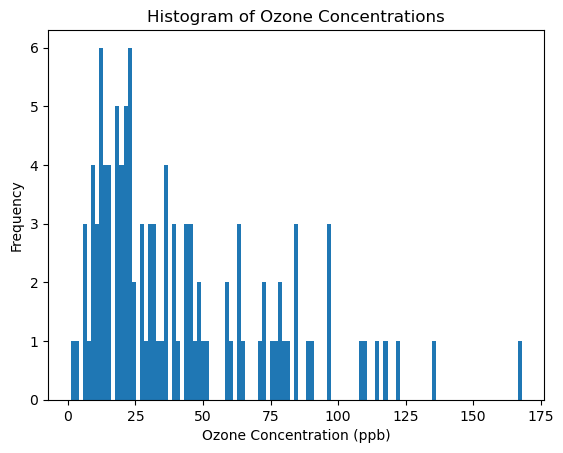

In [686]:
import matplotlib.pyplot as plt


plt.hist(data["Ozone"], bins=data.shape[0])

plt.xlabel("Ozone Concentration (ppb)")
plt.ylabel("Frequency")
plt.title("Histogram of Ozone Concentrations")

plt.show()

### preparation des training_data et test_data 

In [687]:
from sklearn.linear_model import Ridge



alpha = 1.0


ridge = Ridge(alpha=alpha)

# Linear regression

In [688]:
data.shape

(111, 6)

In [689]:
x = data['Wind']
y = data['Ozone']

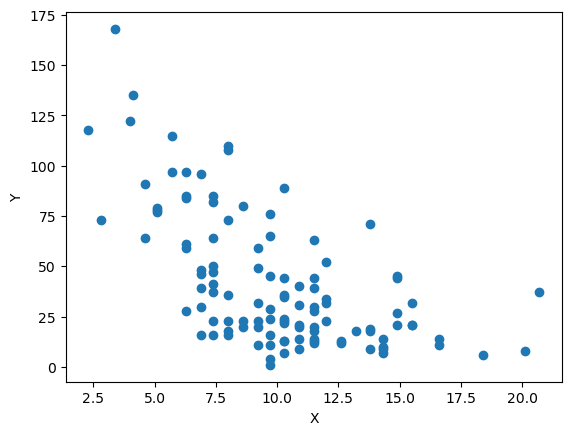

In [690]:
# Creating a scatter plot to visualize the generated data
# - x: Independent variable values (abscissa)
# - y: Dependent variable values (ordinate)
plt.scatter(x, y)

# Adding labels to the axes
plt.xlabel('X')
plt.ylabel('Y')

# Displaying the plot
plt.show()

In [691]:
import numpy as np

# Convertir la série pandas en un tableau numpy
y_array = y.to_numpy()  # ou bien y.values

# dataliquer reshape sur le tableau numpy
y= y_array.reshape(y.shape[0], 1)

# Afficher la nouvelle forme de y après le remodelage
print(y.shape)

(111, 1)


In [692]:
x_array = x.to_numpy()
x= x_array.reshape(x.shape[0], 1)
print(x.shape)

(111, 1)


In [693]:
X = np.hstack((x, np.ones(x.shape)))
print(X.shape)

(111, 2)


In [694]:
np.random.seed(0)  # Set the seed for reproducibility

# Generate a random vector theta with shape (2, 1) using a standard normal distribution
# The shape is (2, 1) indicating it's a column vector with 2 rows and 1 column
theta = np.random.randn(2, 1)

# Display the generated random vector theta
theta

array([[1.76405235],
       [0.40015721]])

In [695]:
X.shape

(111, 2)

In [696]:
theta.shape

(2, 1)

In [697]:
def Linear_model(X, theta):
    return X.dot(theta)

In [698]:
Linear_model(X, theta).shape

(111, 1)

In [699]:
x.shape

(111, 1)

In [700]:
y.shape

(111, 1)

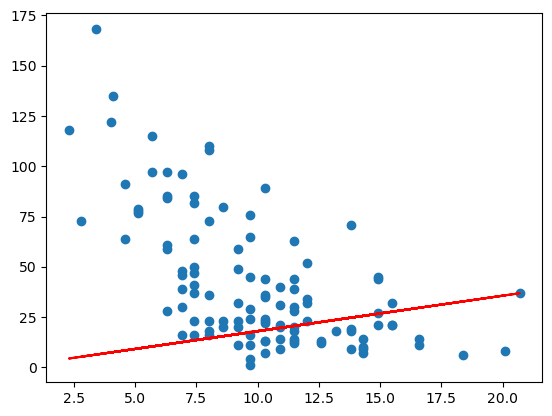

In [701]:
plt.scatter(x, y)
plt.plot(x, Linear_model(X, theta), c='red')

In [702]:
def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((Linear_model(X, theta) - y)**2)

In [703]:
X.shape

(111, 2)

In [704]:
y.shape

(111, 1)

In [705]:
theta.shape

(2, 1)

In [706]:
cost_function(X, y, theta)

986.9062405057683

In [707]:
def grad(X, y, theta , alpha):
    m = len(y)
    return 1/m * alpha * X.T.dot(Linear_model(X, theta) - y)

In [708]:
def gradient_descent(X, y, theta, alpha, learning_rate, n_iterations):
    """
    Perform gradient descent to minimize the cost function.

    Parameters:
    - X: Feature matrix (including the intercept term)
    - y: Target values
    - theta: Initial model parameters
    - learning_rate: Learning rate for gradient descent
    - n_iterations: Number of iterations for gradient descent

    Returns:
    - Optimized model parameters theta
    - Array of cost history (evolution of cost function over iterations)
    """
    cost_history = np.zeros(n_iterations)  # Create an array to store the evolution of the cost function
    
    for i in range(n_iterations):
        # Update theta using gradient descent formula
        theta = theta - learning_rate * grad(X, y, theta, alpha)
        
        # Calculate the cost function value and store it in the cost_history array
        cost_history[i] = cost_function(X, y, theta)
        
    return theta, cost_history

In [709]:
n_iterations = 100
learning_rate = 0.0001
alpha = 1

theta_final, cost_history = gradient_descent(X, y, theta, alpha, learning_rate, n_iterations)

In [710]:
theta_final

array([[2.64149089],
       [0.58950197]])

In [711]:
cost_history

array([984.72249958, 982.58722644, 980.49933931, 978.45778056,
       976.46151616, 974.50953516, 972.60084919, 970.73449191,
       968.90951857, 967.12500551, 965.38004967, 963.67376815,
       962.00529776, 960.37379458, 958.77843352, 957.21840791,
       955.69292908, 954.20122595, 952.74254468, 951.31614824,
       949.92131605, 948.5573436 , 947.22354214, 945.91923825,
       944.64377357, 943.39650442, 942.17680151, 940.98404955,
       939.81764703, 938.67700584, 937.561551  , 936.47072038,
       935.40396436, 934.36074562, 933.34053883, 932.34283036,
       931.36711808, 930.41291104, 929.47972926, 928.56710347,
       927.67457487, 926.8016949 , 925.94802503, 925.11313649,
       924.29661009, 923.49803602, 922.71701358, 921.95315104,
       921.20606539, 920.4753822 , 919.76073536, 919.06176696,
       918.37812708, 917.70947357, 917.05547198, 916.41579526,
       915.79012371, 915.17814474, 914.57955274, 913.99404892,
       913.42134118, 912.8611439 , 912.31317788, 911.77

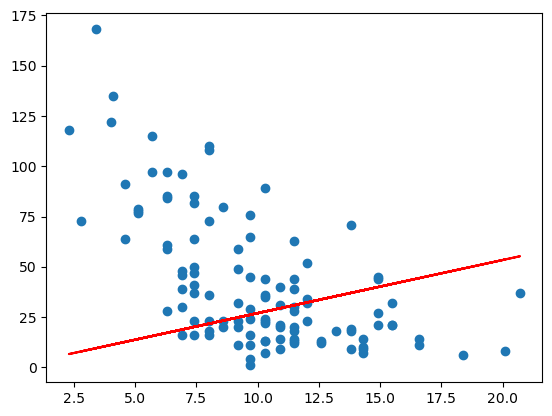

In [712]:
# Create predictions using the trained model and final parameters
predictions = Linear_model(X, theta_final)

# Plot the original data (in blue) and the predictions (in red)
plt.scatter(x, y)  # Scatter plot of the original data
plt.plot(x, predictions, c='r')  # Plot predictions against the x values

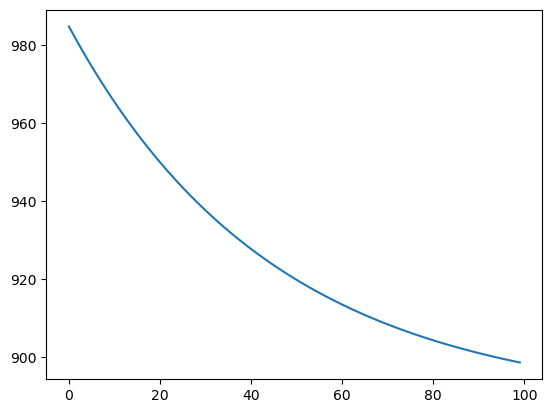

In [713]:
plt.plot(range(n_iterations), cost_history)

In [714]:
def coef_determination(y, pred):
    """
    Calculate the coefficient of determination (R^2 score).

    Parameters:
    - y: Array of true values
    - pred: Array of predicted values

    Returns:
    - Coefficient of determination (R^2 score)
    """
    u = ((y - pred)**2).sum()  # Sum of squared residuals (unexplained variance)
    v = ((y - y.mean())**2).sum()  # Total sum of squares (total variance)
    return 1 - u/v  # Coefficient of determination formula

In [715]:
coef_determination(y, predictions)

-0.6377691939644592